<a href="https://colab.research.google.com/github/vikramgunjal02/Machine-Learning/blob/master/internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title**:Marketing Campaign for Banking Products






 # Import the datasets and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import pyplot
from sklearn.neighbors  import KNeighborsRegressor as knr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Bank is has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

To get the first 5 element from dataset

In [ ]:
#head values
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


To get last element from the dataset

In [ ]:
#last elements
df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Read Headers

In [ ]:
#to read headers
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Read Each column

In [ ]:
#To read particular row value
df['Education']

0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Education, Length: 5000, dtype: int64

 **To check datatype** 


In [ ]:
#To check datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Statistical summary**

In [ ]:
#Statistical Summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Display Income in ascendding order
df.sort_values('Income',ascending=False)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,2989,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,4226,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,51,32,8,8,92093,4,0.70,2,0,0,1,0,1,0
1054,1055,63,38,8,95136,4,0.60,2,0,0,0,0,1,0
2248,2249,63,37,8,94618,1,0.80,2,97,0,0,0,1,0
4223,4224,53,26,8,94709,1,0.50,2,0,0,0,0,0,1


In [ ]:
#To display the mean of age
df["Age"].mean()

45.3384

In [ ]:
#To display the median of age
df["Age"].median()

45.0

In [ ]:
df["Age"].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

**Shape**

In [ ]:
df.mean().shape

(14,)

In [ ]:
#find out shape of dataset
df.shape

(5000, 14)

 **Null Values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Check if you need to clean the data for any of the variables 

there are some records with negative experience. Before proceeding any further we need to clean the same


In [ ]:
#find the count of negative value and attributes name
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
#find the count of negative experience
df[df['Experience'] < 0]['Experience'].count()

52

In these dataset 52 records are negative experience.Clean these negative record here.


In [ ]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()

In [ ]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIP Code,4882.0,93150.227366,2130.612121,9307.0,91910.25,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


# EDA: Study the data distribution in each attribute and target variable, share your findings.

 Number of unique in each column

In [4]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
#number of unique value
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [8]:
df.drop('ZIP Code', axis = 1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


Number of people with zero mortgage

In [ ]:
#NMUBER OF PEOPLE WITH 0 MORTGAGE
count = 0
for i in df['Mortgage']:
  if i == 0:
      count += 1

print(count)

3462


In [ ]:
df['Mortgage'].isin([0]).sum()

3462

In [ ]:
df['CCAvg'].isin([0]).sum()

106

 Number of people with zero credit card spending per month

In [9]:
#Number of people with zero credit card spending per month
(df.CCAvg==0).sum()

106

 Value counts of all categorical columns.

In [11]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [12]:
df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [15]:
# Value counts of all categorical columns.
print(df.Online.value_counts())
print(df.CreditCard.value_counts())
print(df.Family.value_counts())
print(df.Education.value_counts())
print(df['Personal Loan'].value_counts())
print(df['Securities Account'].value_counts())
print(df['ZIP Code'].value_counts())
print(df['CD Account'].value_counts())

1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64


 Univariate and Bivariate analysis

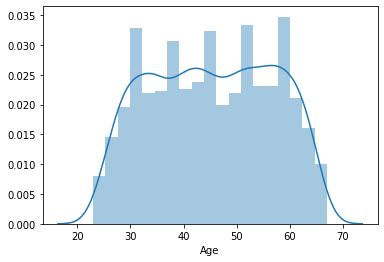

In [18]:
sns.distplot(df.Age);

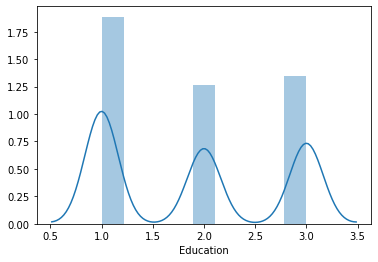

In [19]:
sns.distplot(df.Education);

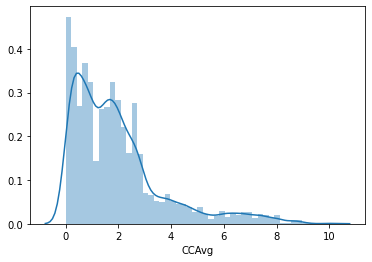

In [20]:
sns.distplot(df.CCAvg);

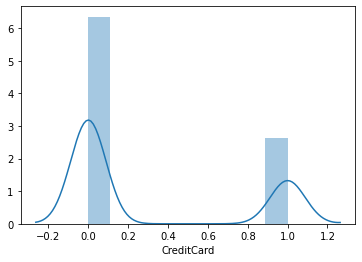

In [21]:
sns.distplot(df.CreditCard);

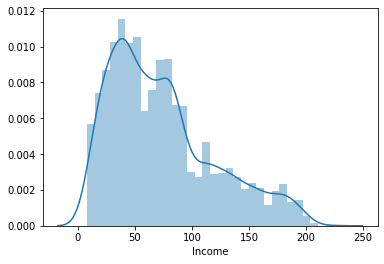

In [22]:
sns.distplot(df.Income);

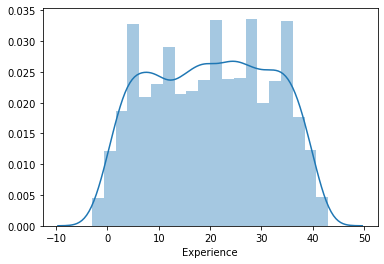

In [23]:
sns.distplot(df.Experience);

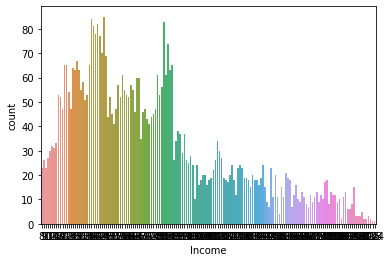

In [24]:
sns.countplot(df.Income)

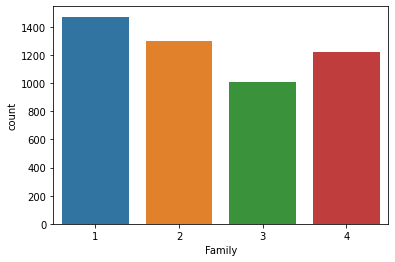

In [25]:
sns.countplot(df.Family)

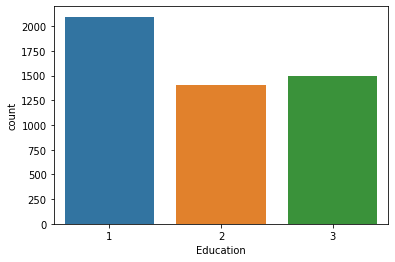

In [26]:
sns.countplot(df.Education)

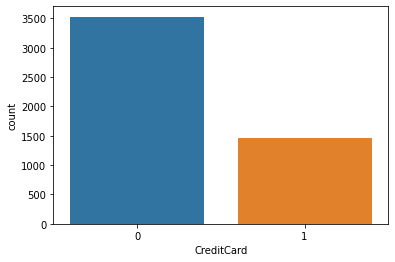

In [27]:
sns.countplot(df.CreditCard)

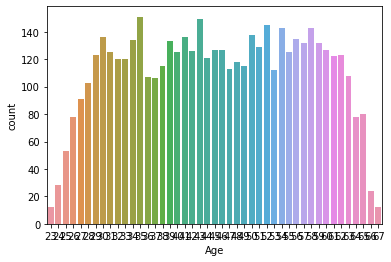

In [28]:
sns.countplot(df.Age)

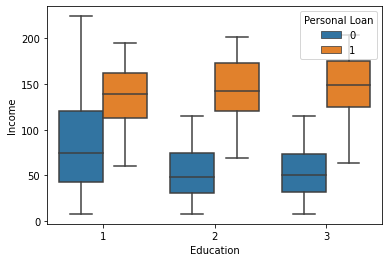

In [30]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan',data=df)

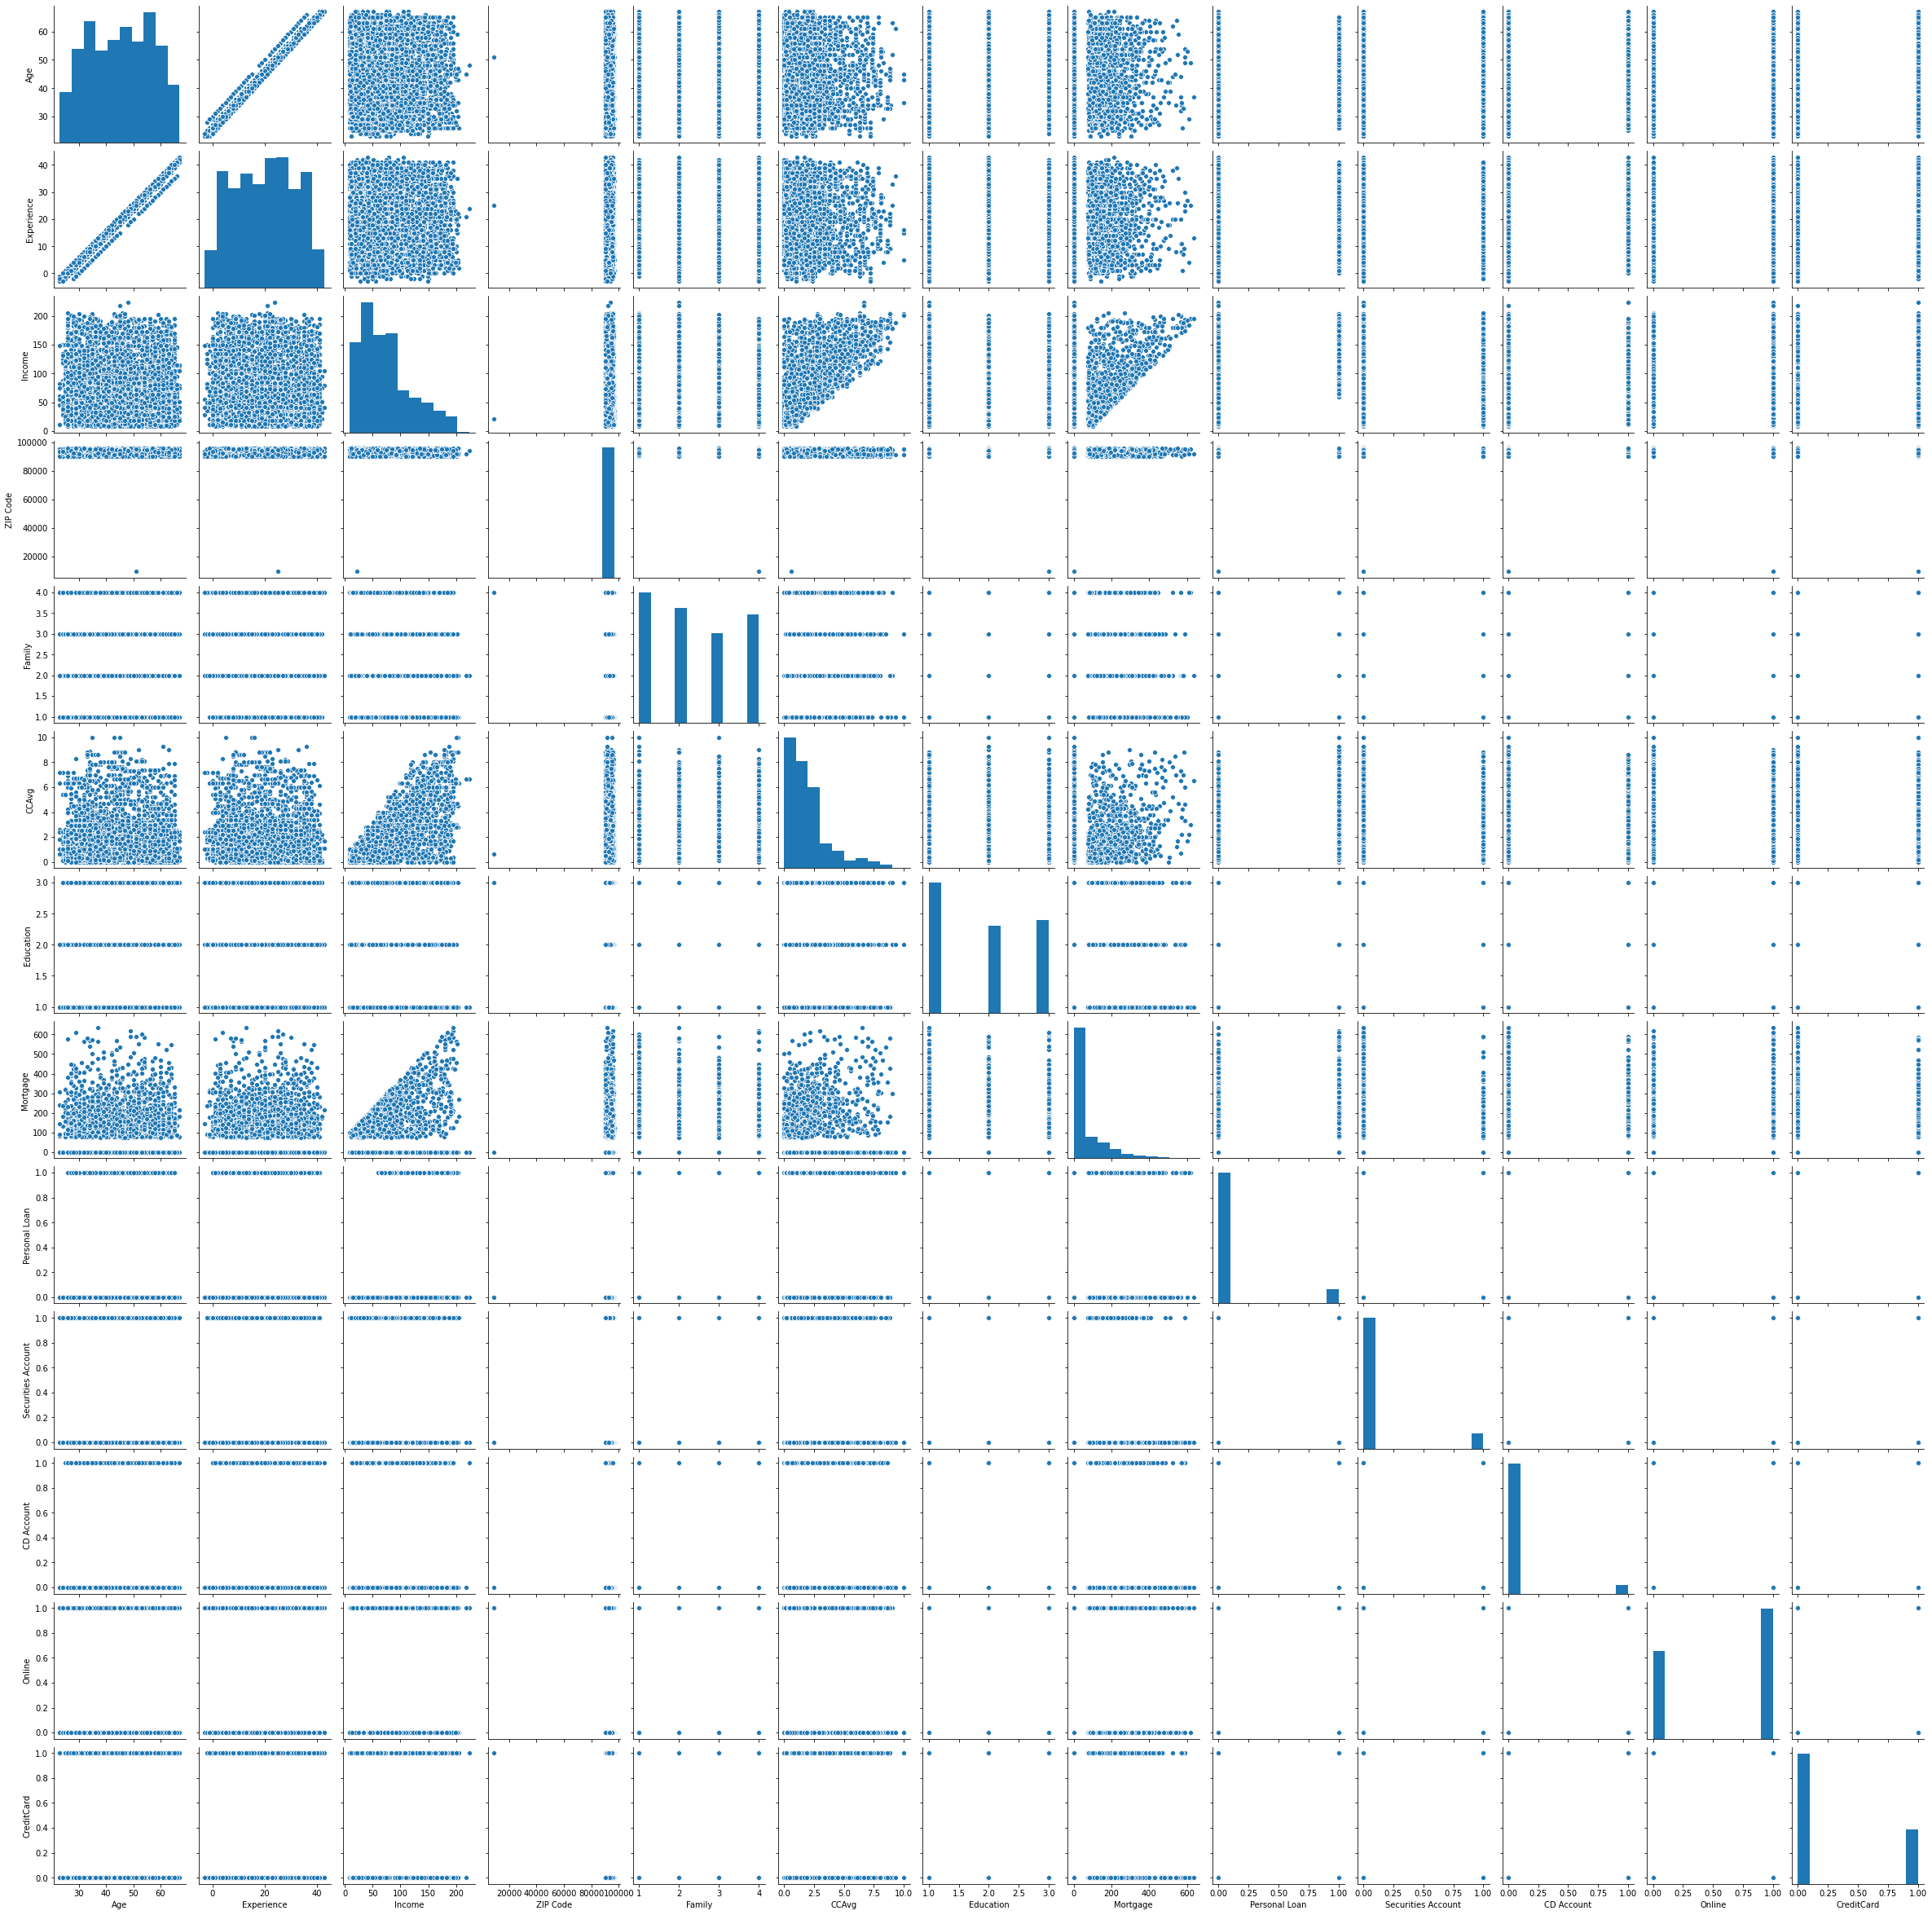

In [ ]:
# UNIVARIATE AND BIVARIATE ANALYSIS.
sns.pairplot(df.iloc[:,1:])

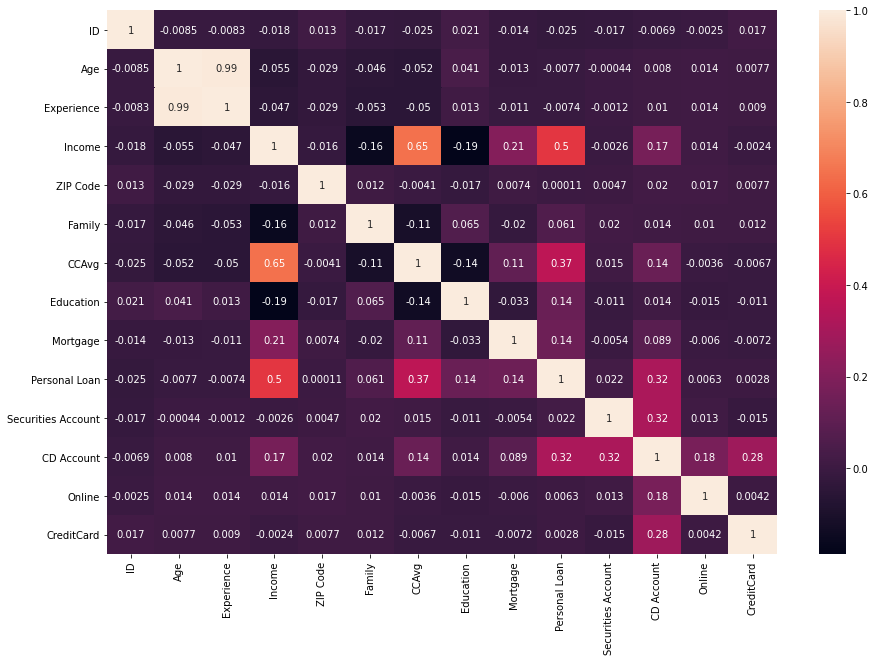

In [ ]:
# Income and CCAvg is moderately correlated.
# Age and Experience is highly correlated
# Also there is a moderate correlation b/w Income and Loan.
corr=df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(corr,annot=True)

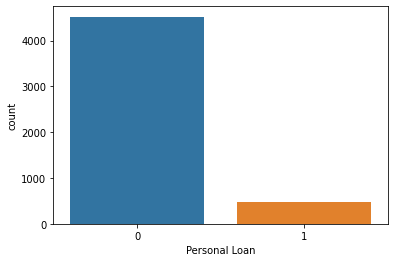

In [ ]:
# SHOW COUNT OF PEOPLE WHO HAVE TAKEN A LOAN and WHO HAVEN't
sns.countplot(x='Personal Loan',data=df)


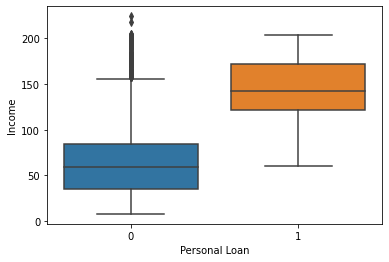

In [ ]:
sns.boxplot(x='Personal Loan',y='Income',data=df)

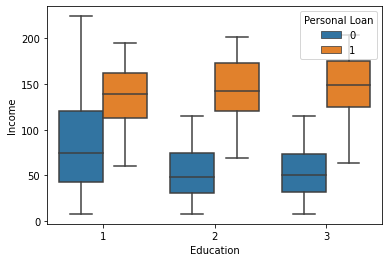

In [ ]:
# NO SPECIFIC CORRELATION BETWEEN AGE AND PERSONAL LOAN, AS ALL AGE GROUPS HAVE PEOPLE WHO HAVE TAKEN LOAN AND WHO HAVE NOT TAKEN LOAN.

#PEOPLE WHO HAVE TAKEN LOANS BELONG TO A PARTICULAR INCOME LEVEL.
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

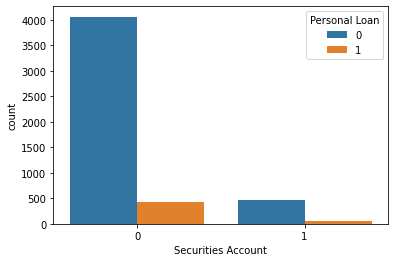

In [ ]:
# CUSTOMERS WHO DON'T TAKE LOANS, HAVE SECURITY ACCOUNT
sns.countplot(x='Securities Account',hue='Personal Loan',data=df)


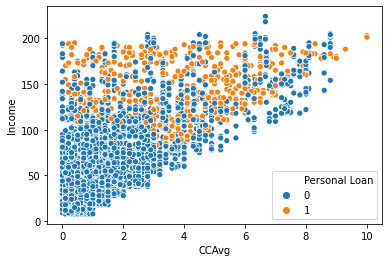

In [ ]:
# With the increase in income, ccavg also increases, and people tend to take more loans.
sns.scatterplot(x='CCAvg',y='Income',hue = 'Personal Loan',data = df)

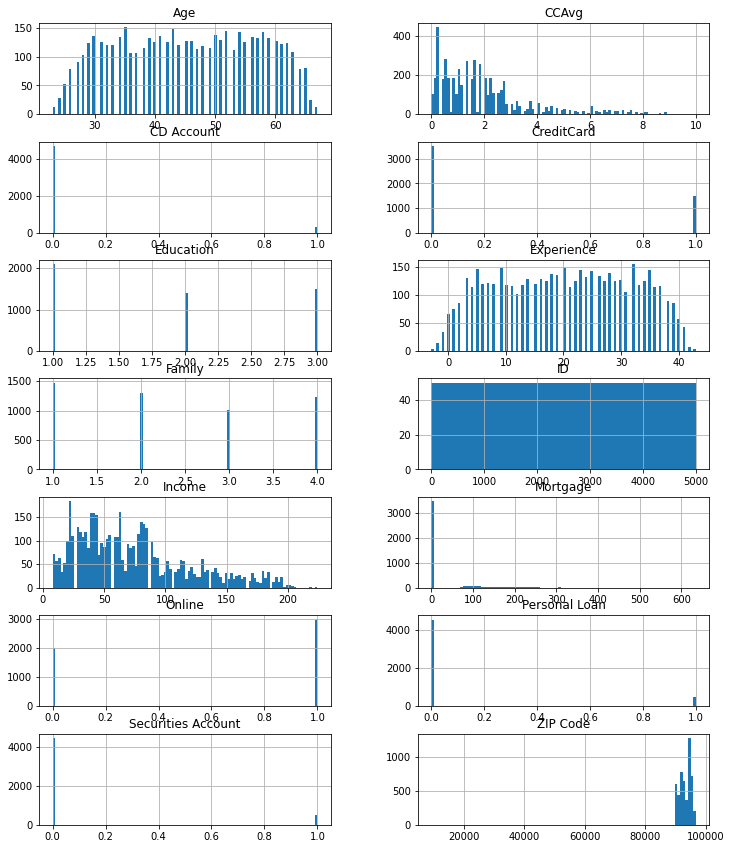

In [ ]:
columns = list(df) # Excluding Outcome column  
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# To see Histogram of all individual data columns

In [ ]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [ ]:
# Define X and Y variables, Personal Loan is our Target Attribute, so same is dropped from X
X = df.drop('Personal Loan', axis=1)
Y = df['Personal Loan']

In [ ]:

X = df.drop('Personal Loan', axis=1)
Y = df['Personal Loan']

#  Normalise your data and split the data into training and test set in the ratio of 70:30
# respectively

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Use the Logistic Regression model to predict the likelihood of a customer buying
personal loans.

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# ML Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_model.score(x_test , y_test)

0.972

In [ ]:
y_predict = dt_model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

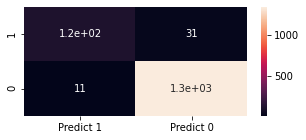

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cm, annot=True)

In [ ]:
cm

array([[ 118,   31],
       [  11, 1340]])

In [ ]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

97.2
20.80536912751678


The confusion matrix

True Positives (TP): we correctly predicted people with Personal Loan: 84

True Negatives (TN): we correctly predicted people without Personal Loan: 1335

False Positives (FP): we incorrectly predicted people who have Personal Loan (a "Type I error"): 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan (a "Type II error"): 65 Falsely predict negative Type II error

In [ ]:
#Build the logistic regression model
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2  ...        11        12  intercept
0 -0.000036 -0.00058 -0.001399  ... -0.000092 -0.000031   -0.00006

[1 rows x 14 columns]


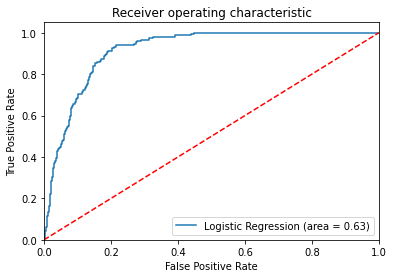

In [ ]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The ROC curve has better True Positive rate than False Positive Rate

In [ ]:
auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.92

# Naive Bayes


In [ ]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

prediction = naive_model.predict(x_train)
naive_model.score(x_train,y_train)

0.8948571428571429

#Random Forest Classifier

In [ ]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

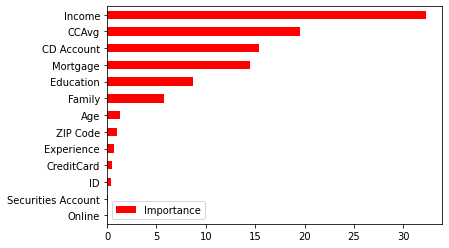

In [ ]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [ ]:
predicted_random=randomforest_model.predict(x_train)
randomforest_model.score(x_train,y_train)

0.9162857142857143

#KNN ( K - Nearest Neighbour )

In [ ]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


#Model comparison

In [ ]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.898600 (0.008902)
CART: 0.982200 (0.005173)
NB: 0.885600 (0.010385)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.986200 (0.003736)


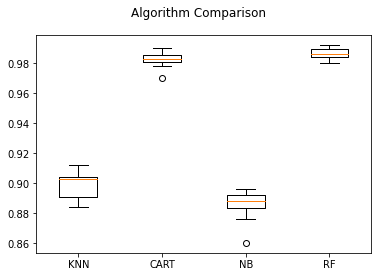

In [ ]:
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Conclusion

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like **Decision Tree algorithm** have the highest accuracy and we can choose that as our final model